<a href="https://colab.research.google.com/github/ross13elder/ross13elder.github.io/blob/main/ENews_Express_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**Problem Statement**

In recent months there has been a decline in new monthly subscribers to E-news Express; thus they have created a new landing page and wants to see if it is in their best interest to use the landing page compared to the old landing page.

**Objective**

Using an experiment of 100 randomly selected users, we will randomly assign half of the users to use the old page design while the other half will use the new page design. We will monitor their time spent on the page, preferred language, and if the user decided to convert to become a subscriber of E-news Express.   Questions we will answer through this investigation are:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?

Answering these questions will help us better asses if transitioning to the new page is worth the companies time and resources.

**Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

- user_id - Unique user ID of the person visiting the website
- group - Whether the user belongs to the first group (control) or the second group (treatment)
- landing_page - Whether the landing page is new or old
- time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
- converted - Whether the user gets converted to a subscriber of the news portal or not
- language_preferred - Language chosen by the user to view the landing page


## Import all the necessary libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics
import seaborn as sns

## Reading the Data into a DataFrame

In [ ]:
# let colab access to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing data set
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Business Statistics/Project/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Displaying first 5 rows of dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Displaying last 5 rows of dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Looking at the dimensions of dataset
df.shape

(100, 6)

In [ ]:
# Looking at type of data in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# Checking t see how many missing values are present in each column
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
# Checking statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [ ]:
# Checking for any duplicates of users
df['user_id'].nunique()

100

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

####**Observations**

- There are 100 rows, and 6 columns in this dataset.  Each row corresponds to one of the 100 randomly selected users.
- There are 2 numerical columns, and 4 object type columns. The user_id column is really a categorical data; therefore, there is really one numerical column which is time spent on the page.  
- **Time Spent on the Page:** On average the amount of time spent on the page is 5.3778 minutes.  The minimum amount of time was .19 minute.  The maximum time was 10.71minutes.
- There are no missing values, and no user is used more than once.
- The dataset takes about 4.8KB.
- There are 3 languages being used, and they are Spanish, French, and English.





### Univariate Analysis

control      50
treatment    50
Name: group, dtype: int64

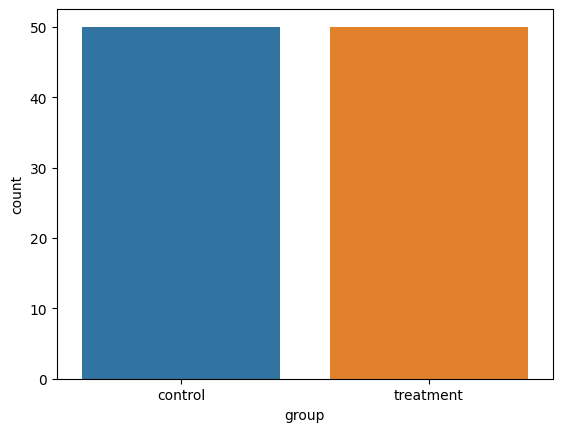

In [ ]:
# Distribution of groups
sns.countplot(data=df, x ='group');
df['group'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

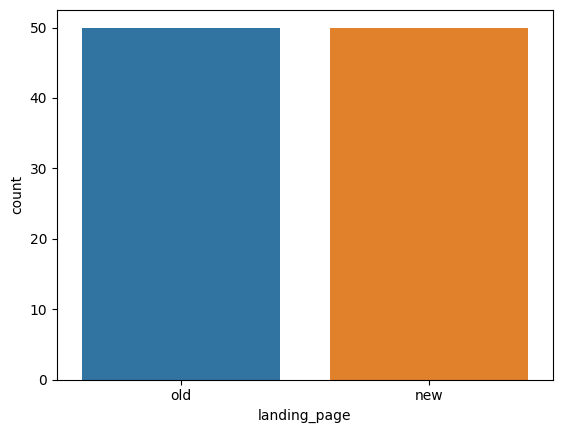

In [ ]:
# Distribution of landing page
sns.countplot(data=df, x='landing_page');
df['landing_page'].value_counts()

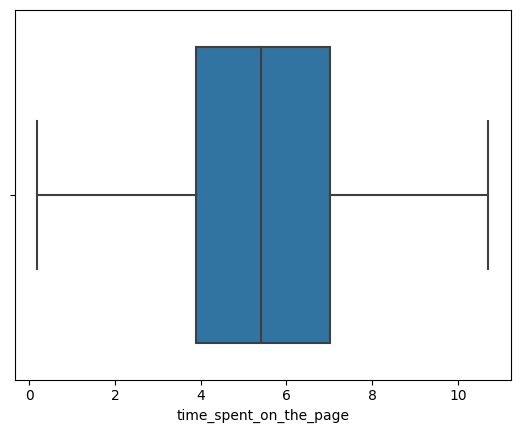

In [ ]:
# Check distribution of time spent on page
sns.boxplot(data=df, x='time_spent_on_the_page');

yes    54
no     46
Name: converted, dtype: int64

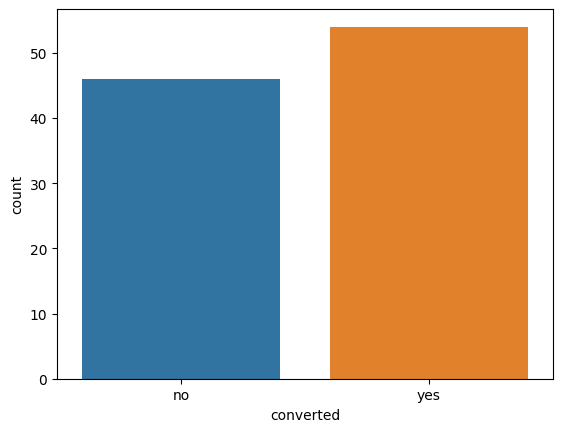

In [ ]:
# Distribution of Converted
sns.countplot(data=df, x='converted');
df['converted'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

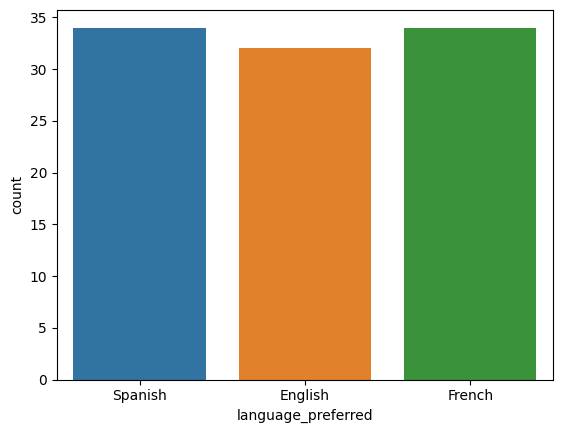

In [ ]:
# Distribution of Languages
sns.countplot(data=df, x='language_preferred');
df['language_preferred'].value_counts()

####**Observations**

- **Users:** There are 100 users
- **Group and Landing Page:** Three are 50 users for the control group and 50 for the treatment group, which is the same for the new page and old page.  This is because the control group is using the old page, while the treatment group is using the new page.  This was stated in the objective statement. This also means one of these columns is not needed.
- **Time Spent on the Page:** The distribution is approximately symmetrical, the mean is 5.3778 minutes. The minimum amount of time was .19 minute, and the maximum time was 10.71minutes to give a range of 10.51minutes.  There are no outliers in this distribution.
- **Language Preferred:** There are three languages used and they are Spanish, English, and French.  Spanish and French each had 34 users, and English had 32.

### Bivariate Analysis

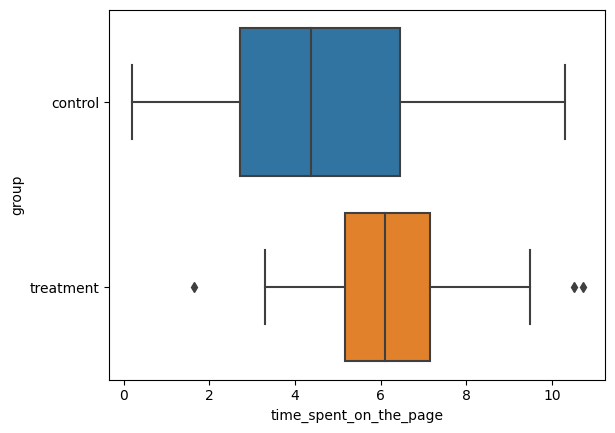

In [ ]:
# Distibution of Group vs Time spent on the page
sns.boxplot(data=df, x='time_spent_on_the_page', y='group');

- The control group has a greater range of time spent on the page than the treatment group.
- Control group(median approx. 4minutes) had a smaller median than the treatment group(median approx. 6minutes) for time spent on the page.
- Treatment group has 3 outliers compared to none in the control group.
- Control group is slightly right skewed, while the treatment group is approx. symmetrical.

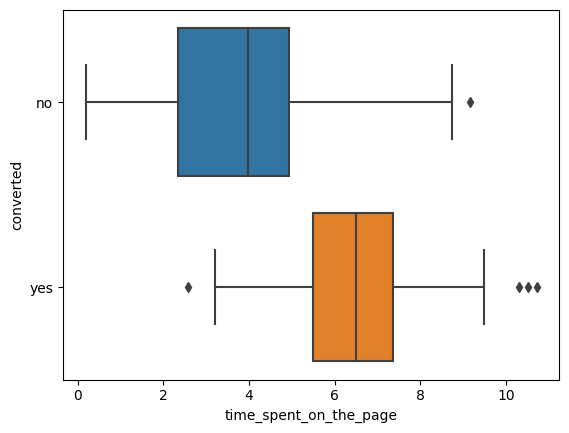

In [ ]:
# Distribution of Time spent on the page vs Converted
sns.boxplot(data=df, x='time_spent_on_the_page', y='converted');

In [ ]:
# Create a new DataFrame for converted users
conv = df[df['converted']=='yes']['time_spent_on_the_page']

# Finding mean and standard deviation for converted users
print('Mean Time spent for converted users is' , conv.mean())
print('Standard deviation for converted users is' , conv.std())

Mean Time spent for converted users is 6.6231481481481485
Standard deviation for converted users is 1.708427307329893


In [ ]:
# Create a new DataFrame for non-converted users
no_conv = df[df['converted']=='no']['time_spent_on_the_page']

# Finding mean and standard deviation for non-converted users
print('Mean Time spent for converted users is' , no_conv.mean())
print('Standard deviation for converted users is' , no_conv.std())

Mean Time spent for converted users is 3.915869565217392
Standard deviation for converted users is 2.226896770632429


- Users who converted have a higher median time spent on the page.
- At least 75% of converted users spent more time on the page than 75% of users who did not convert.
- Users who converted have four outliers, while users who didn't convert have one.
- Both distributions are approx. symetrical, and have approx. the same range.
- Mean amount of time spent on the page for converted users is more than two-and-half minutes than non-converted users

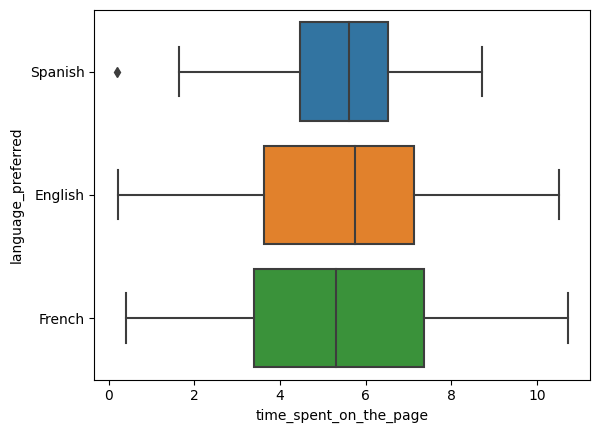

In [ ]:
# Distribution of Time spent on the page vs Language
sns.boxplot(data=df, x='time_spent_on_the_page', y='language_preferred');

- The median amount of time spent on the page is similar for all languages (5.5-6minutes).  English is slightly the highest while French is the lowest.  
- Spanish has a smaller range than English and French
- Spanish has one low outlier, while the others have none
- All the languages dstributions are approx. symmetrical

####Observations
- Language preferred doesn't seem to have much affect on time spent on the page
- Converted users spend more time than non-converted users. The first quartile for converted users is greater than the third quartile of non-converted users.
- Average amount of time spent on the new page is greater than the old page.


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

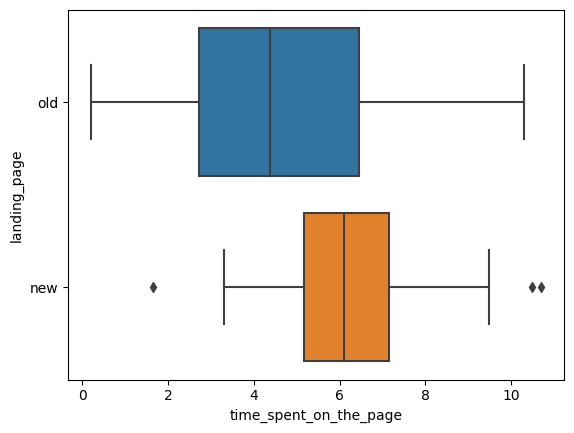

In [ ]:
# Create a boxplot for Time Spent on the Page vs Landing Page
sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page');

- The old page has a greater range of time spent on the page than the new page.
- The old page's median (approx. 4minutes) had a smaller median than the new page median(approx. 6minutes) for time spent on the page.
- The new page has 3 outliers compared to none in the old page.
- The old page time spent is slightly right skewed (close to approx. symmetrical), while the new page time spent is approx. symmetrical.

###Define the null and alternate hypotheses

𝜇1 = true mean time spent on new landing page

𝜇2 = true mean time spent on old landing page

Null hypothesis

𝐻o: 𝜇1=𝜇2

Alternate hypothesis

𝐻𝑎: 𝜇1>𝜇2

### Check Conditions and Select Appropriate Test

- **Random Sampling** - Both samples were randomly selected from the population of interest
- **2 Independent Random Samples** - The control group had no affect on the treatment group. Each group is independent of the other.   
- **Normally Distributed** - Since both samples are greater than 30, we can use the Central Limit Therom to state the sampling distribution of mean time spent on each landing page are approximately normal.

Since all the conditions are met we may run a **Two-Independent Sample T-Test**

###Decide the significance level

We will set our significance level at 5%. ( 𝛂 = 0.05 )

### Collect and prepare data

In [ ]:
# Create a new DataFrame for users using old landing page
old_page = df[df['landing_page']=='old']['time_spent_on_the_page']

# Finding mean and standard deviation of old landing page
print('Mean Time spent on old page is' , old_page.mean())
print('Standard deviation on old page is' , np.std(old_page))

Mean Time spent on old page is 4.532400000000001
Standard deviation on old page is 2.556024694716387


In [ ]:
# Create a new DataFrame for users using new landing page
new_page = df[df['landing_page']=='new']['time_spent_on_the_page']

# Finding mean and standard deviation of new landing page
print('Mean Time spent on new page is' , new_page.mean())
print('Standard deviation on new page is' , np.std(new_page))

Mean Time spent on new page is 6.2232
Standard deviation on new page is 1.7987689568146321


###Calculate the p-value

In [ ]:
# Import the required function
from scipy.stats import ttest_ind

# Finding the p-value
test_stat, p_value = ttest_ind(new_page, old_page, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Conclusion of test

Since the p-value (.000139) < 𝛂 (.05), we reject the null hypothesis.  There is sufficient evidence to state the mean amount of time spent on the new landing page is greater than the time spent on the old landing page.  

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

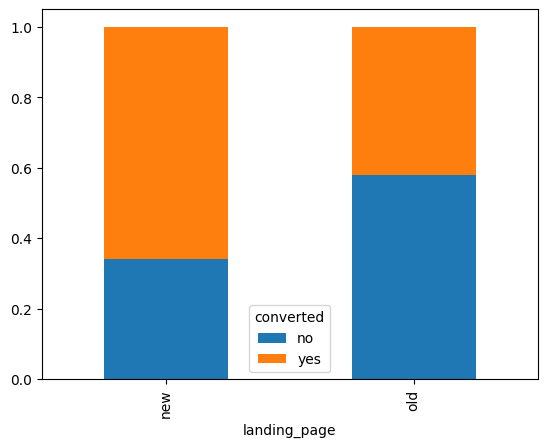

In [ ]:
# Create a stacked bar graph comparing converstion rate vs type of page
pd.crosstab(df['landing_page'], df['converted'], normalize='index').plot(kind='bar', stacked=True);

- Conversion rate for new page ( approx. 66%) is greater than the old page (approx. 42%)

###Define the null and alternate hypotheses

𝑝1 = true proportion of users who visit the landing page and get converted for the new page

𝑝2 =  true proportion of users who visit the landing page and get converted for the old page

Null hypothesis

𝐻o:𝑝1=𝑝2

Alternate hypothesis

𝐻𝑎:𝑝1>𝑝2

### Check Conditions and Select Appropriate Test

In [ ]:
# Finding how many converted for new and old pages
df.groupby(['landing_page']).value_counts(['converted'])

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
dtype: int64

In [ ]:
p1 = 33/50
print('p1 = Proportion of conversion rate for new page is' , p1)
p2 = 21/50
print('p2 = Proportion of conversion rate for old page is' , p2)

p1 = Proportion of conversion rate for new page is 0.66
p2 = Proportion of conversion rate for old page is 0.42


In [ ]:
n1 = 50
n2 = 50
print('𝑛1𝑝1=', n1*p1)
print('𝑛1(1−𝑝1)=', n1*(1-p1))
print('𝑛2𝑝2=', n2*p2)
print('𝑛2(1−𝑝2)=', n2*(1-p2))

𝑛1𝑝1= 33.0
𝑛1(1−𝑝1)= 17.0
𝑛2𝑝2= 21.0
𝑛2(1−𝑝2)= 29.000000000000004


- **Random Sampling** - Both samples were randomly selected from the population of interest
- **2 Independent Random Samples** - The control group had no affect on the treatment group. Each group is independent of the other.
- **Normally Distributed** - n1=50, p1=.66 , n2=50, p2=.42

𝑛1𝑝1 ≥10

𝑛1(1−𝑝1) ≥10

𝑛2𝑝2 ≥10

𝑛2(1−𝑝2) ≥10

Therefore, both sampling distibutions are approximately normal.

Since all the conditions are met we may run a **Two-Proportion Z-Test**

###Decide the significance level

We will set our significance level at 5%. ( 𝛂 = 0.05 )

### Collect and prepare data

In [ ]:
# Create an array of converted users
converted_users = np.array([33, 21])

# Create an array of users for each landing page
sample_size = np.array([50, 50])

###Calculate the p-value

In [ ]:
# Importing the required fuction
from statsmodels.stats.proportion import proportions_ztest

# Finding the p-value
test_stat, p_value = proportions_ztest(converted_users, sample_size, value= 0, alternative = 'larger')
print('The p-value is ' ,p_value)

The p-value is  0.008026308204056278


### Conclusion of test

Since the p-value (.0080263) < 𝛂 (.05), we reject the null hypothesis. There is sufficient evidence to state the conversion rate for the new page is greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

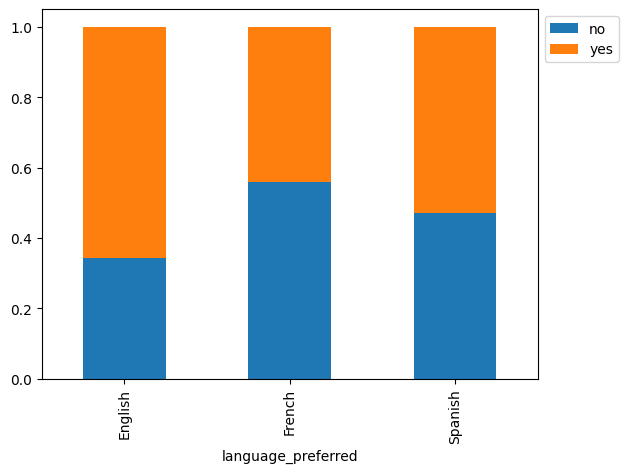

In [ ]:
# Create a stacked bar graph comparing preferred language vs conversion
pd.crosstab(df['language_preferred'], df['converted'], normalize='index').plot(kind='bar', stacked=True);
plt.legend(bbox_to_anchor=(1,1));

English(approx. 65%) has the highest converstion rate, then Spanish(approx. 53%), and then French(approx. 44%)

###Define the null and alternate hypotheses

Null hypothesis

𝐻o:  Converstion status is independent of users preferred language.

Alternate hypothesis

𝐻𝑎:  Converstion status is dependent of  users preferred language.

### Check Conditions and Select Appropriate Test

In [ ]:
# Creating a contingency table between preferred language and convesion status
con_table = pd.crosstab(df['language_preferred'], df['converted'])
con_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [ ]:
# Import required test function
from scipy.stats import chi2_contingency

# Checking Expected Counts and degrees of freedom
chi, p_value, dof, expected = chi2_contingency(con_table)

print("Expected frequencies \n", expected)
print("Degrees of Freedom = ", dof)

Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]
Degrees of Freedom =  2


- **Random Sampling** - It was a random sample of 100 users from the population of interest
- **Expected Counts** - All expected counts are greater than or equal to 5
- Degrees of Freedom is 2.  Calculated by (3-1)(2-1) = 2

All Conditions are met; therefore, we can run a **Chi-Squared Test for Independence**

###Decide the significance level

We will set our significance level at 5%. ( 𝛂 = 0.05 )

###Calculate the p-value

In [ ]:
# Import required test function
from scipy.stats import chi2_contingency

# Calculate test statistic and p-value
chi, p_value, dof, expected = chi2_contingency(con_table)

print("Test Statistic =",chi)
print("p-value =",p_value)

Test Statistic = 3.0930306905370832
p-value = 0.2129888748754345


### Conclusion of test

Since the p-value (.212988874) > 𝛂 (.05) we fail to reject the null hypothesis.  There is not sufficient evidence to suggest conversion status is dependent of users preferred language.  

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
# Create DataFrame for users who used the new landing page
new_page = df[df['landing_page']=='new']

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


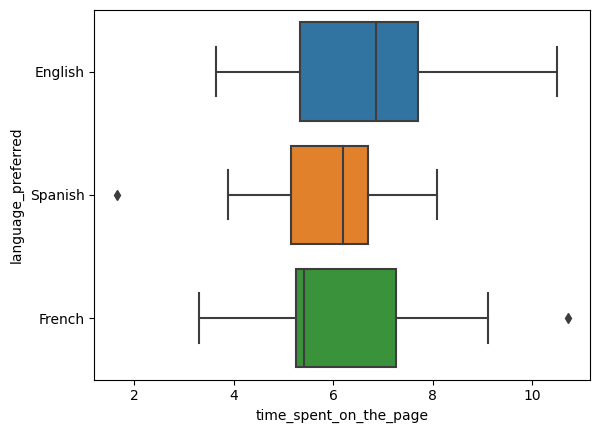

In [ ]:
# Creating Comparitive box-plots of preferred language and time spent on the NEW page
sns.boxplot(data=new_page, x='time_spent_on_the_page', y='language_preferred');

# mean time spent on the page by factor of preferred language
print(new_page.groupby('language_preferred')['time_spent_on_the_page'].mean());

Distributions of time spent on the New page (in minutes) compared to the preferred language.  
- Median time spent on the new page: English has the highest median then Spanish, and French has the smallest.
- Spanish has one low outlier, while French has one high outlier, and then English has no outliers.
- Excluding outliers - English and Spanish distributions are apporximately symmetrical, while the French is skewed right.
- Excluding outliers - English has the largest range, then French, and Spanish has the smallest range.

###Define the null and alternate hypotheses

Let  𝜇1,𝜇2,𝜇3  be the means of time spent on the new page for Spanish, English, and French respectively.

Null hypothesis

𝐻o:  𝜇1=𝜇2=𝜇3

Alternative hypothesis

𝐻𝑎:  At least one mean time spent on the new page is different from the rest in regaurds to preferred languages.

### Check Conditions and Select Appropriate Test

####Use Shapiro-Wilk’s test to check for normality

Null hypothesis

𝐻o:  Time Spent on the new page follows a normal distribution

Alternative hypothesis

𝐻𝑎:  Time Spent on the new page does not follow a normal distribution

In [ ]:
# Calculating the p-value
w, p_value = stats.shapiro(new_page['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value (.804) of the Shapiro-Wilk's test is larger than the significance level (𝛂 = .05), we fail to reject the null hypothesis that the response follows the normal distribution. There is not sufficient evidence that the time spent on the page does not follow a normal distribution.

####Use Levene’s test to check for equality of variances

Null hypothesis

𝐻o : All the population variances are equal

Alternative hypothesis

𝐻𝑎 : At least one variance is different from the rest

In [ ]:
# Homogeneity of Variance
# Import the required function
from scipy.stats import levene

statistic, p_value = levene( new_page['time_spent_on_the_page'][new_page['language_preferred']=="English"],
                                   new_page['time_spent_on_the_page'][new_page['language_preferred']=="French"],
                                   new_page['time_spent_on_the_page'][new_page['language_preferred']=="Spanish"])
# Calculate p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value (.4671) is greater than the significance level of (𝛂 = .05), we fail to reject the null hypothesis. There is not sufficient evidence to suggest that at least one variance is different from the rest.

**Conditions are met: **
- **Normality:** Populations are normally distributed and is verified by the Shapiro-Wilk's test
- **Variances are Equal:** Homogeneity of variance is verified using the Levene's Test
- **Independent Random Samples:** Samples are independent random samples from the population of interest

Since all conditions are met we may proceed to use a **One-Way ANOVA Test**



###Decide the significance level

We will set our significance level at 5%. ( 𝛂 = 0.05 )

###Calculate the p-value

In [ ]:
# Import the required function
from scipy.stats import f_oneway

# Perform one-way ANOVA test
test_stat, p_value = f_oneway(new_page.loc[new_page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new_page.loc[new_page['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              new_page.loc[new_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' , p_value)

The p-value is  0.43204138694325955


### Conclusion of test

Since the p-value (.432) is greater than our alpha (.05), we fail to reject the null hypothesis.  There is not sufficient evidence to suggest that at least one mean time spent on the new page is different from the rest in regaurds to preferred languages.

## Conclusion and Business Recommendations

####**Conclusions**

**Time Spent on the Landing Page:**

- On average the amount of time spent on on both pages was 5.3778 minutes. The minimum amount of time was .19 minutes, and the maximum time was 10.71minutes.
- Language preference doesn't seem to have much affect on time spent on the page
- Converted users spend more time than non-converted users. The first quartile for converted users is greater than the third quartile of non-converted users.
- Average amount of time spent on the new page is greater than the old page.

> *We found there is statistically significant more time spent on the new landing page compared to the old landing page.*

**Conversion of Users**

- At least 75% of converted users spent more time on the page than 75% of users who did not convert.
- Mean amount of time spent on the page for converted users is more than two-and-half minutes greater than non-converted users.
- Conversion rate for new page is greater than the old page by about 20%.

> *We found there is a statistically significant higher conversion rate for the new page than the conversion rate for the old page.*

> We did not find sufficient evidence to suggest conversion status is dependent of users preferred language.


**Language Preference**

- The median amount of time spent on the page is similar for all languages (approx. 5.5-6minutes). English is slightly the highest while French is the lowest.
- It appears Language Preference has minimal impact on the users decisions and time spent on the new page.

> We did not find sufficient evidence to suggest the mean time spent on the new page is different based on the users preferred languages.


####**Recommendations:**
 - We would recommend switching to the new page, since users spend more time on the page and have a higher conversion rate compared to the old page.
 - Research and studies should be done based on gender as well to see the effect of time spent and conversion.
 - Research should be done on the type of news. Local news versus World news to see if this has an impact on time spent on the page and conversion rate.  


___